#Data Science Intern at Let's Grow More LGMVIP -Aug

#More Advanced Level Task

# ML Facial recognition to detect mood and suggest songs accordingly

#K Kiran

In [2]:
import zipfile

def unzip_file(zip_file_path, extract_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
zip_file_path = '/content/archive (3).zip'
extract_dir = ''

unzip_file(zip_file_path, extract_dir)

In [3]:
pip install scikit-image

In [4]:
import numpy as np
import cv2
import os
import random
from skimage.io import imread
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from IPython.display import Audio

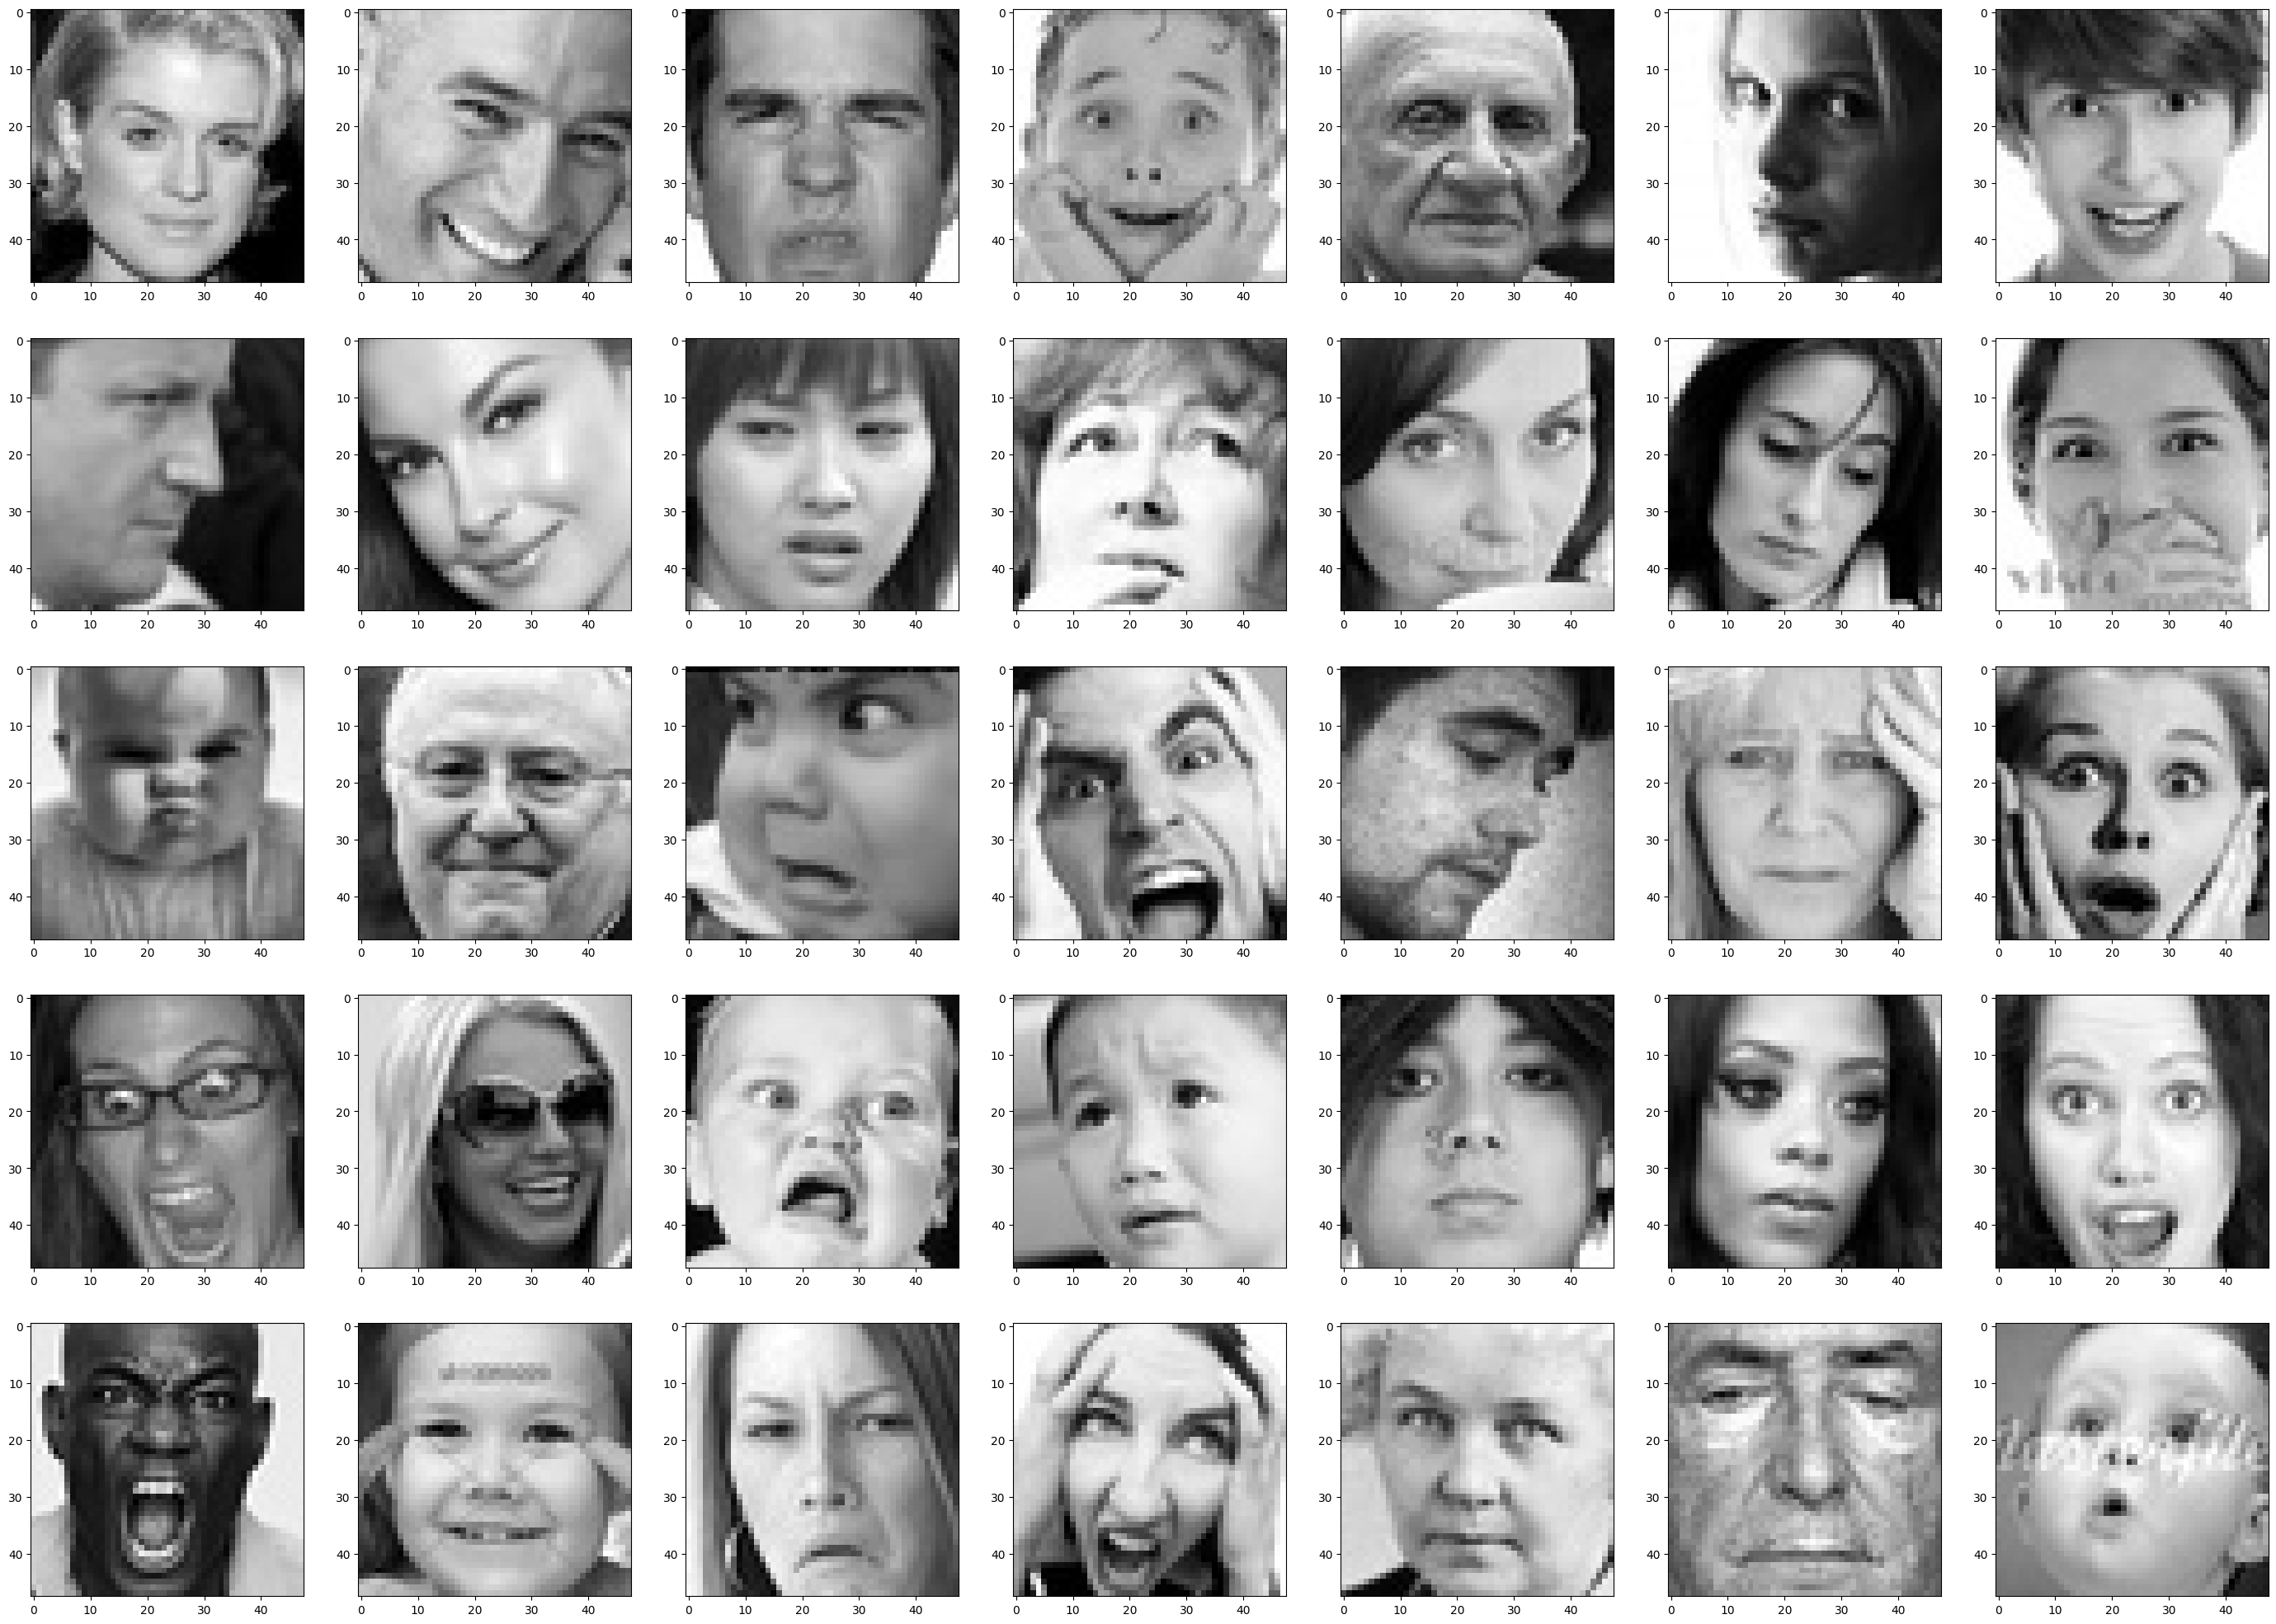

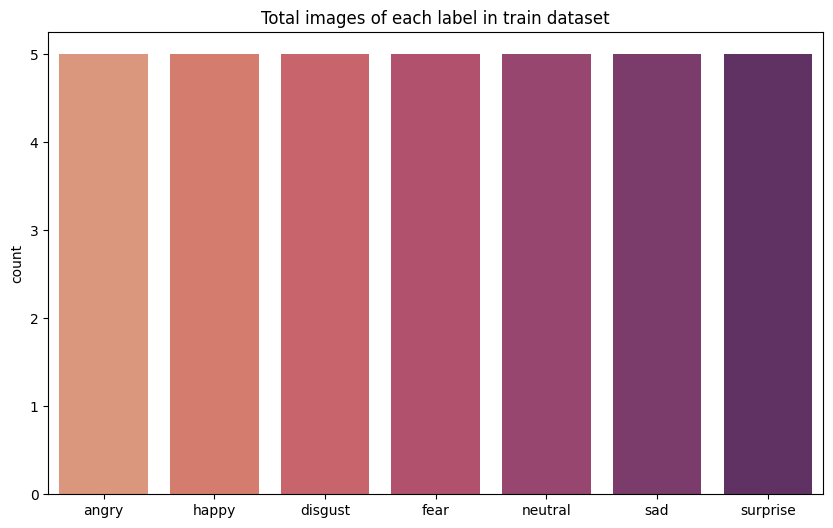

In [6]:
from skimage.io import imread
import matplotlib.pyplot as plt

train_dir = "/content/train"
total_labels = len(os.listdir(train_dir))
fig, ax = plt.subplots(nrows=5, ncols=total_labels, figsize=(35, 25))
df = {}

for x in range(5):
    for y, v in enumerate(os.listdir(train_dir)):
        img_path = os.path.join(train_dir, v, os.listdir(os.path.join(train_dir, v))[x])
        ax[x][y].imshow(imread(img_path), cmap='gray')

        if v in df:
            df[v] += 1
        else:
            df[v] = 1

plt.show()
df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y="total", palette="flare", data=df)
plt.ylabel("count")
plt.title("Total images of each label in train dataset")
plt.show()


In [11]:
happy = os.listdir(train_dir+'/happy')
dim1, dim2 = [], []

for img_filename in happy:
    img = imread('/content/train/happy/Training_10046809.jpg')
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)


In [13]:
train_gen = ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_gen = ImageDataGenerator(rescale=1/255)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)

train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_gen.flow_from_directory(directory='/content/test',
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#Creating the Model


In [14]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=img_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=len(os.listdir(train_dir)), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

#Training the model


In [18]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size
num_epochs = 20

history = model.fit(train_generator,
                    epochs=num_epochs,
                    verbose=1,
                    validation_data=test_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/20
448/448 [==============================] - 48s 75ms/step - loss: 1.8711 - accuracy: 0.2330 - val_loss: 2.9370 - val_accuracy: 0.1755
Epoch 2/20
448/448 [==============================] - 30s 67ms/step - loss: 1.7964 - accuracy: 0.2477 - val_loss: 1.7887 - val_accuracy: 0.2687
Epoch 3/20
448/448 [==============================] - 31s 69ms/step - loss: 1.7813 - accuracy: 0.2603 - val_loss: 1.7493 - val_accuracy: 0.2999
Epoch 4/20
448/448 [==============================] - 29s 66ms/step - loss: 1.7644 - accuracy: 0.2737 - val_loss: 1.6875 - val_accuracy: 0.3213
Epoch 5/20
448/448 [==============================] - 31s 68ms/step - loss: 1.7452 - accuracy: 0.2837 - val_loss: 1.6455 - val_accuracy: 0.3301
Epoch 6/20
448/448 [==============================] - 30s 66ms/step - loss: 1.7196 - accuracy: 0.2997 - val_loss: 1.6582 - val_accuracy: 0.3442
Epoch 7/20
448/448 [==============================] - 29s 65ms/step - loss: 1.6824 - accuracy: 0.3206 - val_loss: 1.6452 - val_accuracy:

In [20]:
model.save("model.h5")


#Evaluating the model


In [21]:
test_loss, test_acc = model.evaluate(test_generator)
print("validation accuracy :", str(test_acc*100)+"%")
print("validation loss :", test_loss)

113/113 [==============================] - 4s 37ms/step - loss: 1.2036 - accuracy: 0.5306
validation accuracy : 53.064918518066406%
validation loss : 1.2036278247833252


#Plotting Training and Validation plot


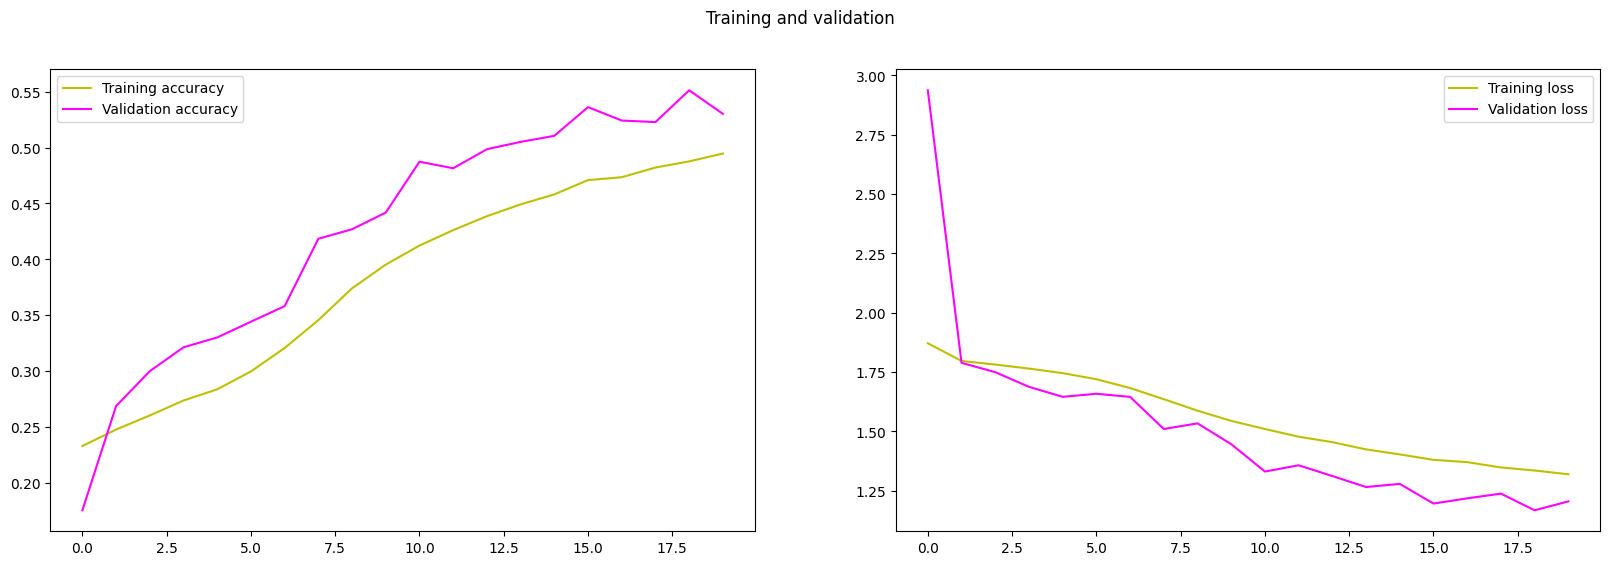

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'magenta', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'magenta', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

#Plotting the confusion matrix


113/113 [==============================] - 3s 27ms/step
              precision    recall  f1-score   support

       angry       0.47      0.38      0.42       958
     disgust       0.25      0.01      0.02       111
        fear       0.47      0.09      0.15      1024
       happy       0.58      0.93      0.71      1774
     neutral       0.43      0.64      0.52      1233
         sad       0.46      0.28      0.35      1247
    surprise       0.72      0.68      0.70       831

    accuracy                           0.53      7178
   macro avg       0.48      0.43      0.41      7178
weighted avg       0.51      0.53      0.48      7178





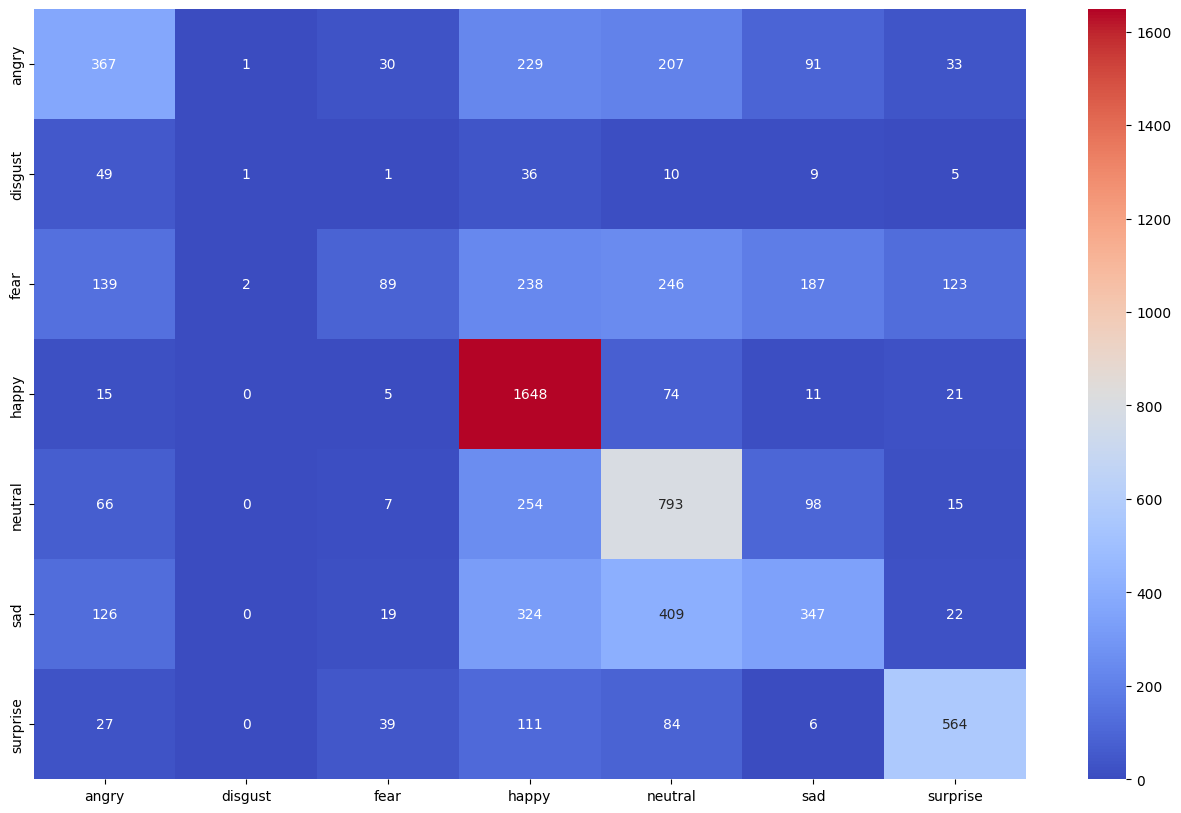

In [25]:

from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(model.predict(test_generator), axis=-1)
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()), end='\n\n\n')

cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(16,10))
sns.heatmap(cm, cmap=plt.cm.coolwarm, annot=True, fmt='.0f', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.show()

#Testing our model with image


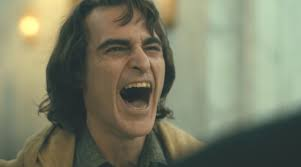

In [31]:
image = cv2.imread("/content/df.jpeg")
from IPython.display import Image
Image(filename='/content/df.jpeg')

In [32]:
import cv2
from tensorflow.python.keras.models import load_model
import os
EMOTIONS = ['Angry', 'Disgust', 'Happy', 'Sad', 'Surprise', 'Neutral']
img = image
frame = cv2.resize(img,(48,48),interpolation=cv2.INTER_BITS2)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) / 255.0
gray = gray.reshape(1,48,48,1)
predicts = model.predict(gray)[0]
label = EMOTIONS[predicts.argmax()]
for (i,j) in zip(range(7),EMOTIONS):
    predictss = predicts[i]
    print("{:^10s}".format(j)+"prediction rate is   {0:.2f}%".format(predictss))
print( "\n\n The system considers this expression to be:",label)

1/1 [==============================] - 0s 19ms/step
  Angry   prediction rate is   0.18%
 Disgust  prediction rate is   0.01%
  Happy   prediction rate is   0.10%
   Sad    prediction rate is   0.14%
 Surprise prediction rate is   0.32%
 Neutral  prediction rate is   0.22%


 The system considers this expression to be: Surprise


#Music Recommdation



In [47]:

if (label=='Surprise'):
    path="/content/happy.mp3"
    audio = Audio(filename=path,autoplay=True)
    display(audio)

elif (label=='Angry'):
    path="/content/Angry.mp3"
    audio = Audio(filename=path,autoplay=True)
    display(audio)

elif (label=='Happy'):
    path="/content/happy.mp3"
    audio = Audio(filename=path,autoplay=True)
    display(audio)

elif (label=='Sad'):
    path="/content/Sad.mp3"
    audio = Audio(filename=path,autoplay=True)
    display(audio)

elif (label=='Neutral'):
    path="/content/Neutral.mp3"
    audio = Audio(filename=path,autoplay=True)
    display(audio)

elif (label=='Disgust'):
    path="/content/Disgust.mp3"
    audio = Audio(filename=path,autoplay=True)
    display(audio)